# GW Waveform

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from gwpy.timeseries import TimeSeries
from gwpy.plot import Plot
from astropy.utils.data import get_readable_fileobj

In [2]:
noise = TimeSeries(np.random.normal(scale=.1, size=16384), sample_rate=16384)

## Get data

In [3]:
source = 'https://losc.ligo.org/s/events/GW150914/P150914/'
url = '%s/fig2-unfiltered-waveform-H.txt' % source
with get_readable_fileobj(url) as f:
    signal = TimeSeries.read(f, format='txt')
signal.t0 = .5  # make sure this intersects with noise time samples

In [4]:
signal = signal.taper()
data = noise.inject(signal)

## Plot

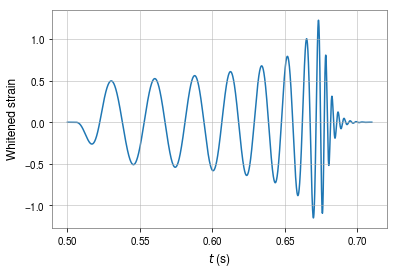

In [10]:
fig, ax = plt.subplots()#
plt.plot(signal)
plt.grid(True)  
plt.xlabel(r"$t$ (s)")
plt.ylabel(r"Whitened strain")
plt.show()
fig.savefig('./images/signal.png')